In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc


In [12]:
df = pd.read_csv('./BQ_rfc_predicitons.csv', dtype={'user_pseudo_id': str})
df['user_pseudo_id'] = df['user_pseudo_id'].astype(str)
df.head()

,user_pseudo_id,conversion_flag,predicted_conversion_flag,conversion_probability
0,765828894.1743733904,0,1,0.865822
1,1603333851.1743925946,0,1,0.865822
2,2043382298.1740959089,0,1,0.865822
3,255881488.1743817507,0,1,0.865822
4,1444449766.1743402946,0,1,0.865822


probability_group
0-10%         0
10-20%     4070
20-30%       50
30-40%       18
40-50%        9
50-60%        5
60-70%       27
70-80%       13
80-90%       54
90-100%       0
Name: count, dtype: int64


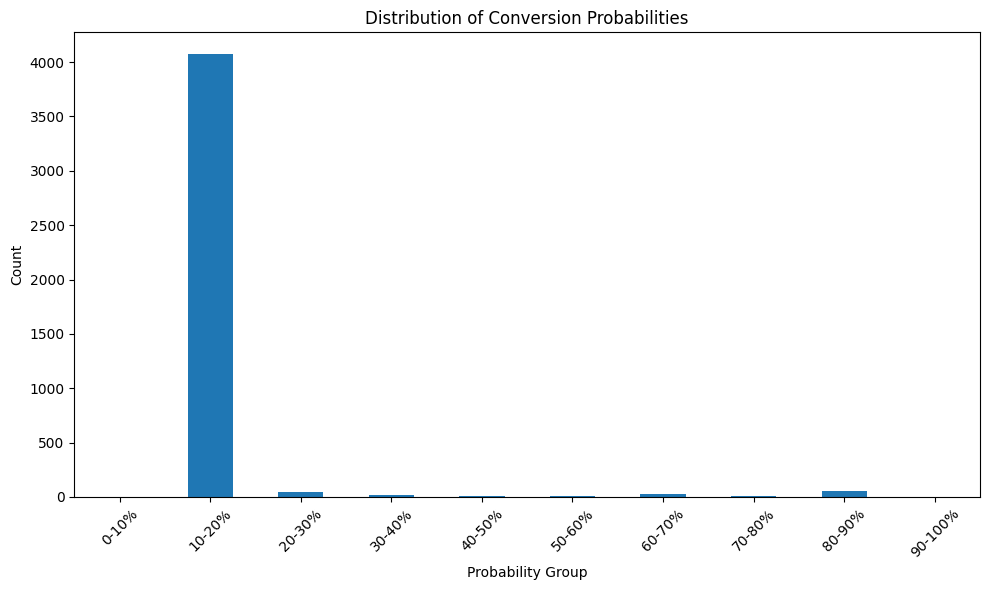

In [16]:
#classify conversion_probabilty in groups [0% to 10%], [10% to 20%], [20% to 30%], [30% to 40%], [40% to 50%], [50% to 60%], [60% to 70%], [70% to 80%], [80% to 90%], [90% to 100%
# Create bins for conversion probability from 0% to 100% in 10% increments
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Classify conversion probabilities into bins
df['probability_group'] = pd.cut(df['conversion_probability'], bins=bins, labels=labels, include_lowest=True)

# Display the count of records in each bin
prob_group_counts = df['probability_group'].value_counts().sort_index()
print(prob_group_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
prob_group_counts.plot(kind='bar')
plt.title('Distribution of Conversion Probabilities')
plt.xlabel('Probability Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





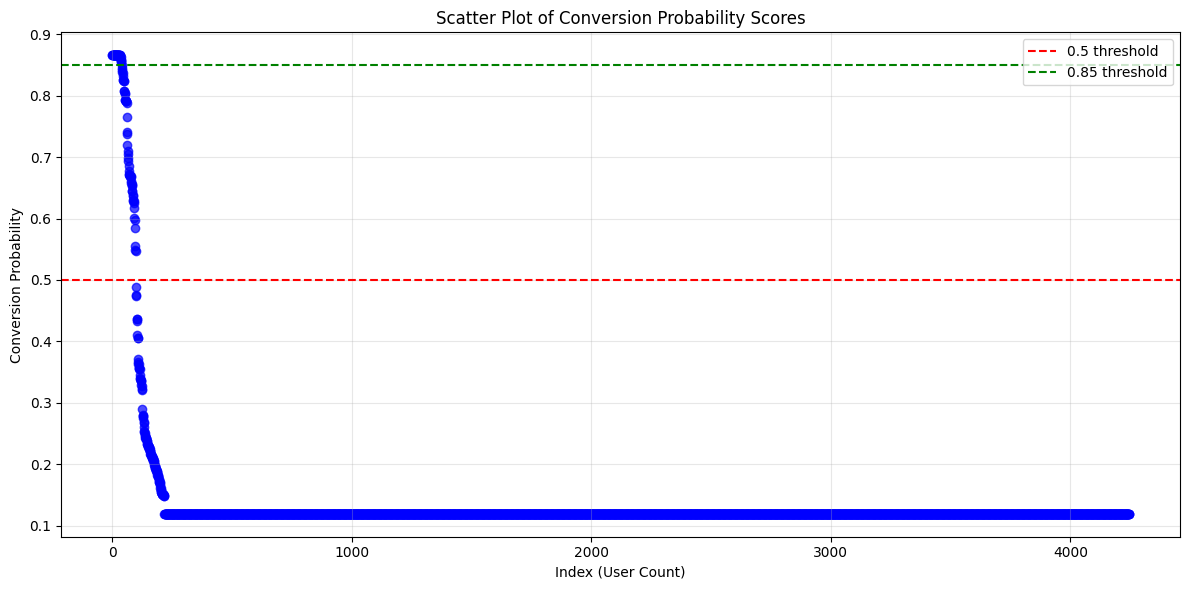

In [17]:
# Create a scatter plot of just the conversion probability scores
plt.figure(figsize=(12, 6))

#order DF by conversion_probability
df = df.sort_values(by='conversion_probability', ascending=False)

# Use index as x-axis to spread out the points
plt.scatter(range(len(df)), df['conversion_probability'], alpha=0.7, color='blue')

# Add a horizontal line at common threshold values
plt.axhline(y=0.5, color='red', linestyle='--', label='0.5 threshold')
plt.axhline(y=0.85, color='green', linestyle='--', label='0.85 threshold')

# Add labels and title
plt.xlabel('Index (User Count)')
plt.ylabel('Conversion Probability')
plt.title('Scatter Plot of Conversion Probability Scores')

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
bins = [0, 0.5, 0.85, 1.0] 
labels = ['LOW', 'MEDIUM', 'HIGH']

df['conversion_probability_group'] = pd.cut(df['conversion_probability'], 
                                           bins=bins, 
                                           labels=labels, 
                                           include_lowest=True)


prob_group_counts = df['conversion_probability_group'].value_counts().sort_index()
print(prob_group_counts)


conversion_probability_group
LOW       4147
MEDIUM      59
HIGH        40
Name: count, dtype: int64


In [19]:
df

,user_pseudo_id,conversion_flag,predicted_conversion_flag,conversion_probability,probability_group,conversion_probability_group
0,765828894.1743733904,0,1,0.865822,80-90%,HIGH
8,284719956.1743734177,0,1,0.865822,80-90%,HIGH
6,693056027.1743735079,0,1,0.865822,80-90%,HIGH
2,2043382298.1740959089,0,1,0.865822,80-90%,HIGH
3,255881488.1743817507,0,1,0.865822,80-90%,HIGH
...,...,...,...,...,...,...
4240,972273770.1744004720,0,0,0.119392,10-20%,LOW
4241,1212603481.1723196228,0,0,0.119392,10-20%,LOW
4242,1057294849.1743983265,0,0,0.119392,10-20%,LOW
4243,965607559.1743977409,0,0,0.119392,10-20%,LOW


In [21]:
#write to csv
df.to_csv('audience_data.csv', index=False)